## Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv(r'C:\Users\win 10\Downloads\Sample-Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
print('Nunber of Rows :',df.shape[0])
print('Nunber of Columns :',df.shape[1])

Nunber of Rows : 9994
Nunber of Columns : 21


## Understand the data

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Drop Unnesseccry columns 

In [6]:
df =df.drop(columns=['Row ID','Customer Name','Postal Code'])

## Convert 'Ship Date' and ' Order Date' columns data type into Datetime 

In [7]:
df['Order Date'] =pd.to_datetime(df['Order Date'])
df['Ship Date'] =pd.to_datetime(df['Ship Date'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   datetime64[ns]
 3   Ship Mode     9994 non-null   object        
 4   Customer ID   9994 non-null   object        
 5   Segment       9994 non-null   object        
 6   Country       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Region        9994 non-null   object        
 10  Product ID    9994 non-null   object        
 11  Category      9994 non-null   object        
 12  Sub-Category  9994 non-null   object        
 13  Product Name  9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

## Extract Year, Month, Day from 'Ship Date' and ' Order Date' columns

In [9]:
# From Order Date column

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month 
df['Order Month Name'] = df['Order Date'].dt.month_name()
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

# From Ship Date column

df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month 
df['Ship Month Name'] = df['Ship Date'].dt.month_name()
df['Ship Day of Week'] = df['Ship Date'].dt.dayofweek



In [10]:
column =df.columns
column

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Month Name',
       'Order Day of Week', 'Ship Year', 'Ship Month', 'Ship Month Name',
       'Ship Day of Week'],
      dtype='object')

In [11]:
print('Nunber of Columns :',df.shape[1])

Nunber of Columns : 26


## Year To Year Growth

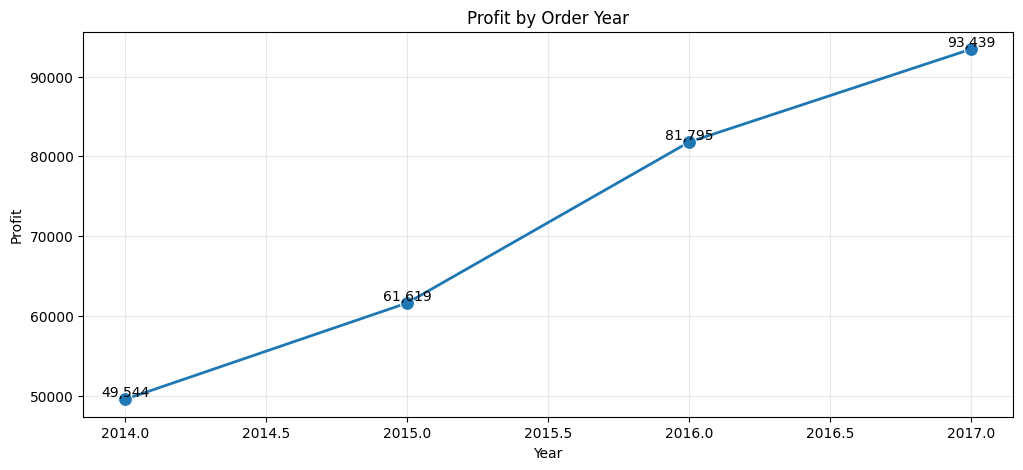

In [12]:
df_years = df.groupby(['Order Year'],as_index=False)['Profit'].sum()


# Plot Graph
plt.figure(figsize=(12,5))

ax = sns.lineplot(
    x='Order Year',
    y='Profit',
    data=df_years,
    marker='o',             # marker show karega
    markersize=10,          # marker size
    linewidth=2
)

# Value labels for each point
for i, value in enumerate(df_years['Profit']):
    plt.text(
        df_years['Order Year'][i],   # x position
        df_years['Profit'][i],       # y position
        f"{value:,.0f}",             # formatted value
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Profit by Order Year")
plt.ylabel("Profit")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)

plt.show()

In [13]:


# Year-by-Year Growth Calculation
df_years['YoY Growth (%)'] = df_years['Profit'].pct_change() * 100

# Round for better readability
df_years['YoY Growth (%)'] = df_years['YoY Growth (%)'].round(2)

print(df_years)

   Order Year      Profit  YoY Growth (%)
0        2014  49543.9741             NaN
1        2015  61618.6037           24.37
2        2016  81795.1743           32.74
3        2017  93439.2696           14.24


Conclusion:-  
The above graph  shows that the company is profitable and growing year after year.

## Sales Analysis  by Category and Sub-Catgory

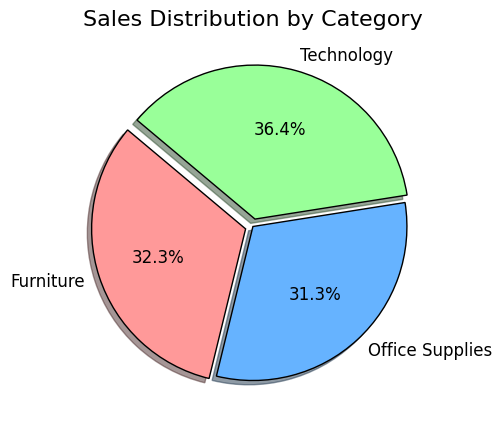

In [14]:
sales_by_category = df.groupby(['Category'], as_index=False)['Sales'].sum()

# Plot Graph
plt.figure(figsize=(5,5))

explode = [0.05, 0, 0.05]   # explode first & last slice

plt.pie(
    sales_by_category['Sales'],
    labels=sales_by_category['Category'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=explode,
    
    colors=['#ff9999','#66b3ff','#99ff99'],  # custom colors
    wedgeprops={'edgecolor':'black', 'linewidth':1},
    textprops={'fontsize':12, 'color':'black'}
)

plt.title("Sales Distribution by Category", fontsize=16)
plt.show()


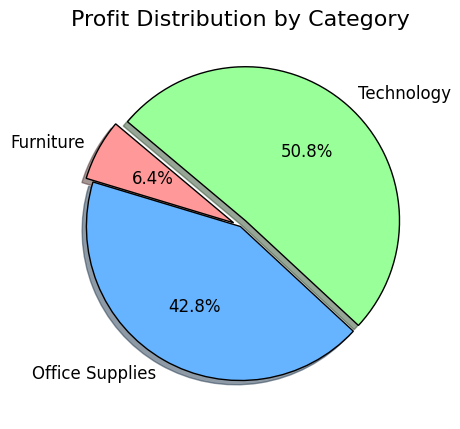

In [15]:
profit_by_category = df.groupby(['Category'], as_index=False)['Profit'].sum()

# Plot
plt.figure(figsize=(5,5))

explode = [0.05, 0, 0.05]   # explode first & last slice

plt.pie(
    profit_by_category['Profit'],
    labels=profit_by_category['Category'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=explode,
    
    colors=['#ff9999','#66b3ff','#99ff99'],  # custom colors
    wedgeprops={'edgecolor':'black', 'linewidth':1},
    textprops={'fontsize':12, 'color':'black'}
)

plt.title("Profit Distribution by Category", fontsize=16)
plt.show()


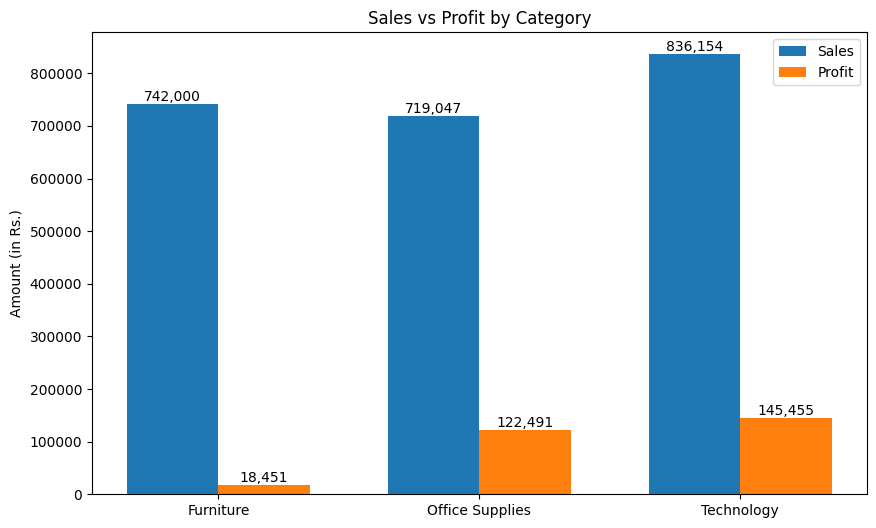

In [16]:
profit_VS_sales_by_category = df.groupby(['Category'], as_index=False)[['Profit','Sales']].sum()

# Plot Graph
categories = profit_VS_sales_by_category['Category']
sales = profit_VS_sales_by_category['Sales']
profit = profit_VS_sales_by_category['Profit']

# Bar width
bar_width = 0.35
x = np.arange(len(categories))

plt.figure(figsize=(10,6))

# Bars
plt.bar(x - bar_width/2, sales, width=bar_width, label='Sales')
plt.bar(x + bar_width/2, profit, width=bar_width, label='Profit')

# Labels
plt.xticks(x, categories)
plt.ylabel("Amount (in Rs.)")
plt.title("Sales vs Profit by Category")

# Add values on top of bars
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, sales[i], f"{sales[i]:,.0f}", ha='center', va='bottom')
    plt.text(x[i] + bar_width/2, profit[i], f"{profit[i]:,.0f}", ha='center', va='bottom')

plt.legend()
plt.show()

## Sales Distribution by Sub-Category

In [17]:
pivot_table = pd.pivot_table(
    df,
    values='Sales',
    index=['Category', 'Sub-Category'],
    aggfunc='sum'
).reset_index()
pivot_table['Sales_Lakhs'] = (pivot_table['Sales'] / 100000).round(2)

pivot_table

,Category,Sub-Category,Sales,Sales_Lakhs
0,Furniture,Bookcases,114879.9963,1.15
1,Furniture,Chairs,328449.1030,3.28
2,Furniture,Furnishings,91705.1640,0.92
3,Furniture,Tables,206965.5320,2.07
4,Office Supplies,Appliances,107532.1610,1.08
5,Office Supplies,Art,27118.7920,0.27
6,Office Supplies,Binders,203412.7330,2.03
7,Office Supplies,Envelopes,16476.4020,0.16
8,Office Supplies,Fasteners,3024.2800,0.03
9,Office Supplies,Labels,12486.3120,0.12


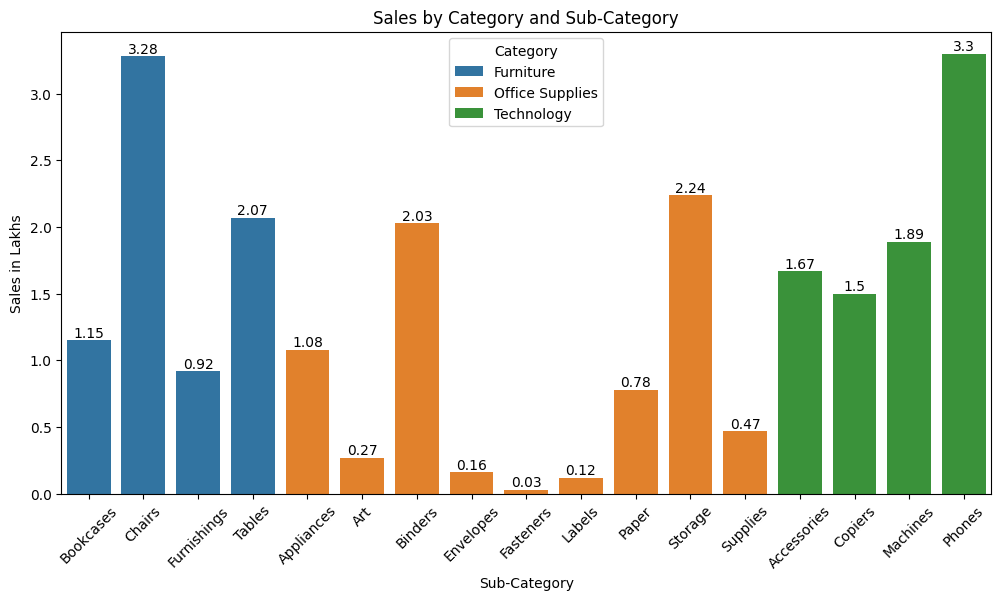

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
ax=sns.barplot(
    data=pivot_table,
    x='Sub-Category',
    y='Sales_Lakhs',
    hue='Category',
    errorbar=None,
)
for bars in ax.containers:
    ax.bar_label(bars)    


plt.ylabel('Sales in Lakhs')
plt.xticks(rotation=45)
plt.title('Sales by Category and Sub-Category')
plt.show()


## Profit Distribution by Sub-Category

In [19]:
pivot_table1 = pd.pivot_table(
    df,
    values='Profit',
    index=['Category', 'Sub-Category'],
    aggfunc='sum'
).reset_index()


pivot_table1

,Category,Sub-Category,Profit
0,Furniture,Bookcases,-3472.5560
1,Furniture,Chairs,26590.1663
2,Furniture,Furnishings,13059.1436
3,Furniture,Tables,-17725.4811
4,Office Supplies,Appliances,18138.0054
5,Office Supplies,Art,6527.7870
6,Office Supplies,Binders,30221.7633
7,Office Supplies,Envelopes,6964.1767
8,Office Supplies,Fasteners,949.5182
9,Office Supplies,Labels,5546.2540


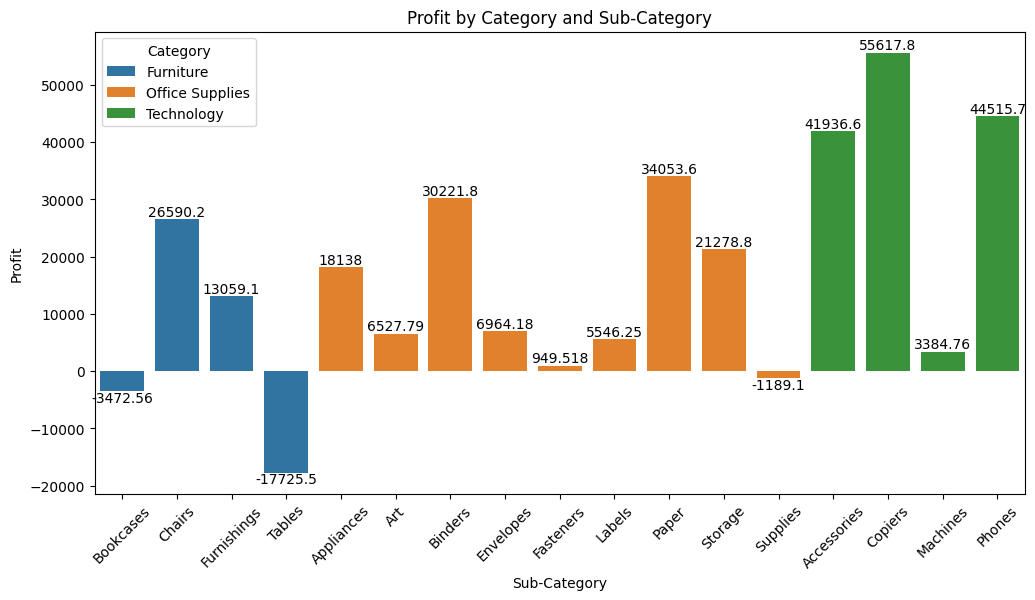

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
ax=sns.barplot(
    data=pivot_table1,
    x='Sub-Category',
    y='Profit',
    hue='Category',
    errorbar=None,
)
for bars in ax.containers:
    ax.bar_label(bars)    


plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.title('Profit by Category and Sub-Category')
plt.show()


Top Profitable Sub-Category:-  Coliers, Phones and Accessories
Top loss-making Sub-Category :- Tables, Bookcases, Supplies

Technology Category:
Generates the highest profit, with major contributors being Phones (44,516) and Copiers (55,618).
Accessories is also a strong contributor (41,937).
Overall, Technology is clearly the primary profit driver for the business.

Office Supplies Category:
Generates moderate profit, with key contributors such as Paper (34,054), Storage (21,279), and Binders (30,222).
Some sub-categories are in loss, such as Supplies (-1,189), but the overall Office Supplies category remains profitable.

Furniture Category:
Shows mixed performance. Chairs (26,590) and Furnishings (13,059) are profitable, but Tables (-17,725) and Bookcases (-3,473) are in loss.
Furniture’s profit contribution is comparatively the lowest, and some sub-categories show negative profit, making this a weak-performing segment.

Summary Insight:
The company’s growth and profit are primarily driven by Technology and Office Supplies.
It is essential to control losses in the Furniture segment and optimize underperforming products.

In [21]:
column

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Month Name',
       'Order Day of Week', 'Ship Year', 'Ship Month', 'Ship Month Name',
       'Ship Day of Week'],
      dtype='object')

## Top 25 Profitable Products

In [22]:
top_25_products = (
    df.groupby('Product Name', as_index=False)['Profit']
      .mean()
      .sort_values(by='Profit', ascending=False)
      .head(25)
)
top_25_products.head()


,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,5039.98560
405,Canon imageCLASS MF7460 Monochrome Digital Las...,1995.99000
165,Ativa V4110MDD Micro-Cut Shredder,1886.47305
19,"3D Systems Cube Printer, 2nd Generation, Magenta",1858.98570
1840,Zebra ZM400 Thermal Label Printer,1671.76800


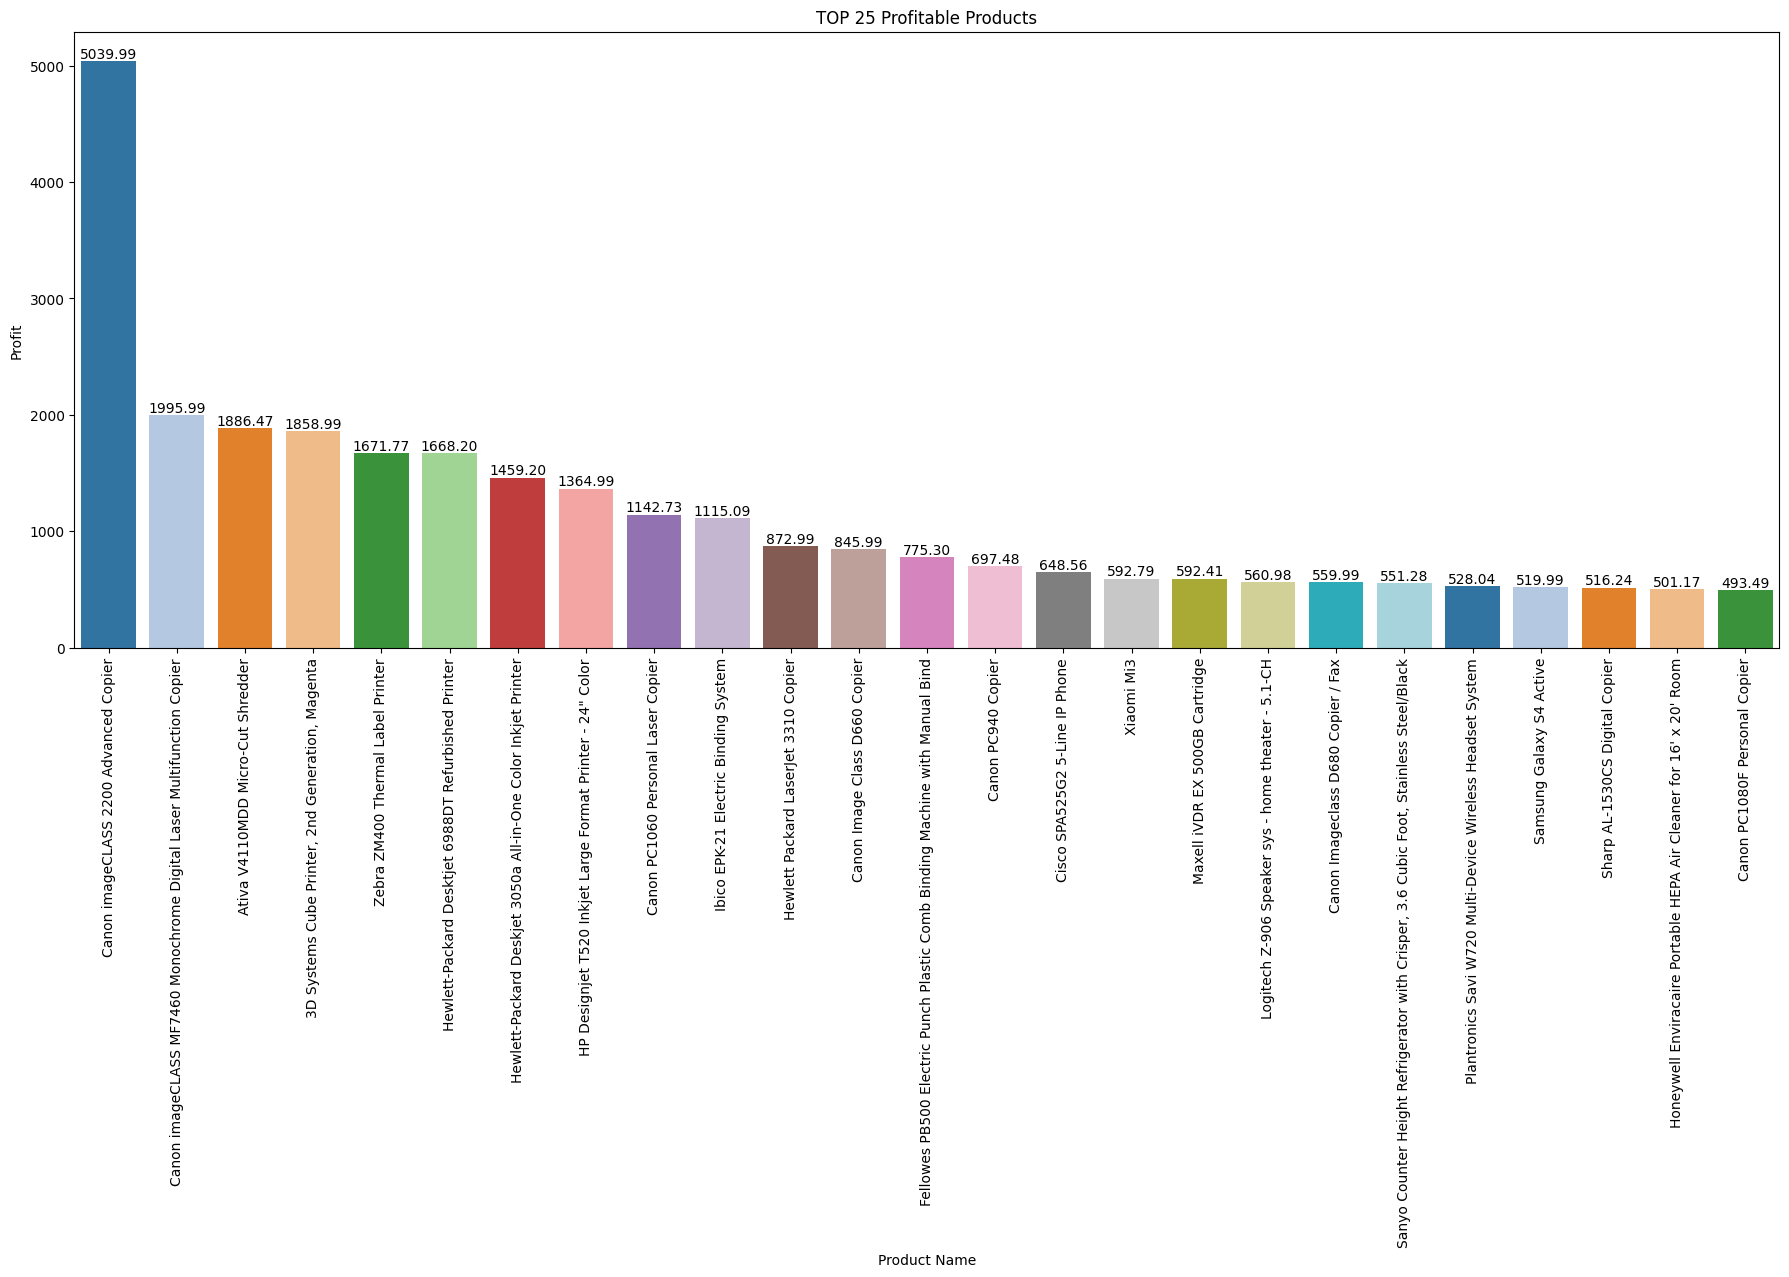

In [23]:
# Plot Graph
plt.figure(figsize=(22,8))
ax =sns.barplot(x='Product Name',
                y='Profit',
                data =top_25_products,
                hue='Product Name',
                palette='tab20')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2f')

plt.xticks(rotation=90)
plt.title('TOP 25 Profitable Products')
plt.show()

## Top 25 loss generated Products

In [24]:
top_25_losser_products = (
    df.groupby('Product Name', as_index=False)['Profit']
      .mean()
      .sort_values(by='Profit', ascending=True)
      .head(25)
)
top_25_losser_products.head()


,Product Name,Profit
476,Cubify CubeX 3D Printer Triple Head Print,-3839.990400
475,Cubify CubeX 3D Printer Double Head Print,-2959.990133
444,Cisco TelePresence System EX90 Videoconferenci...,-1811.078400
985,Lexmark MX611dhe Monochrome Laser Printer,-1147.493250
1838,Zebra GK420t Direct Thermal/Thermal Transfer P...,-938.280000


C:\Users\win 10\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\win 10\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


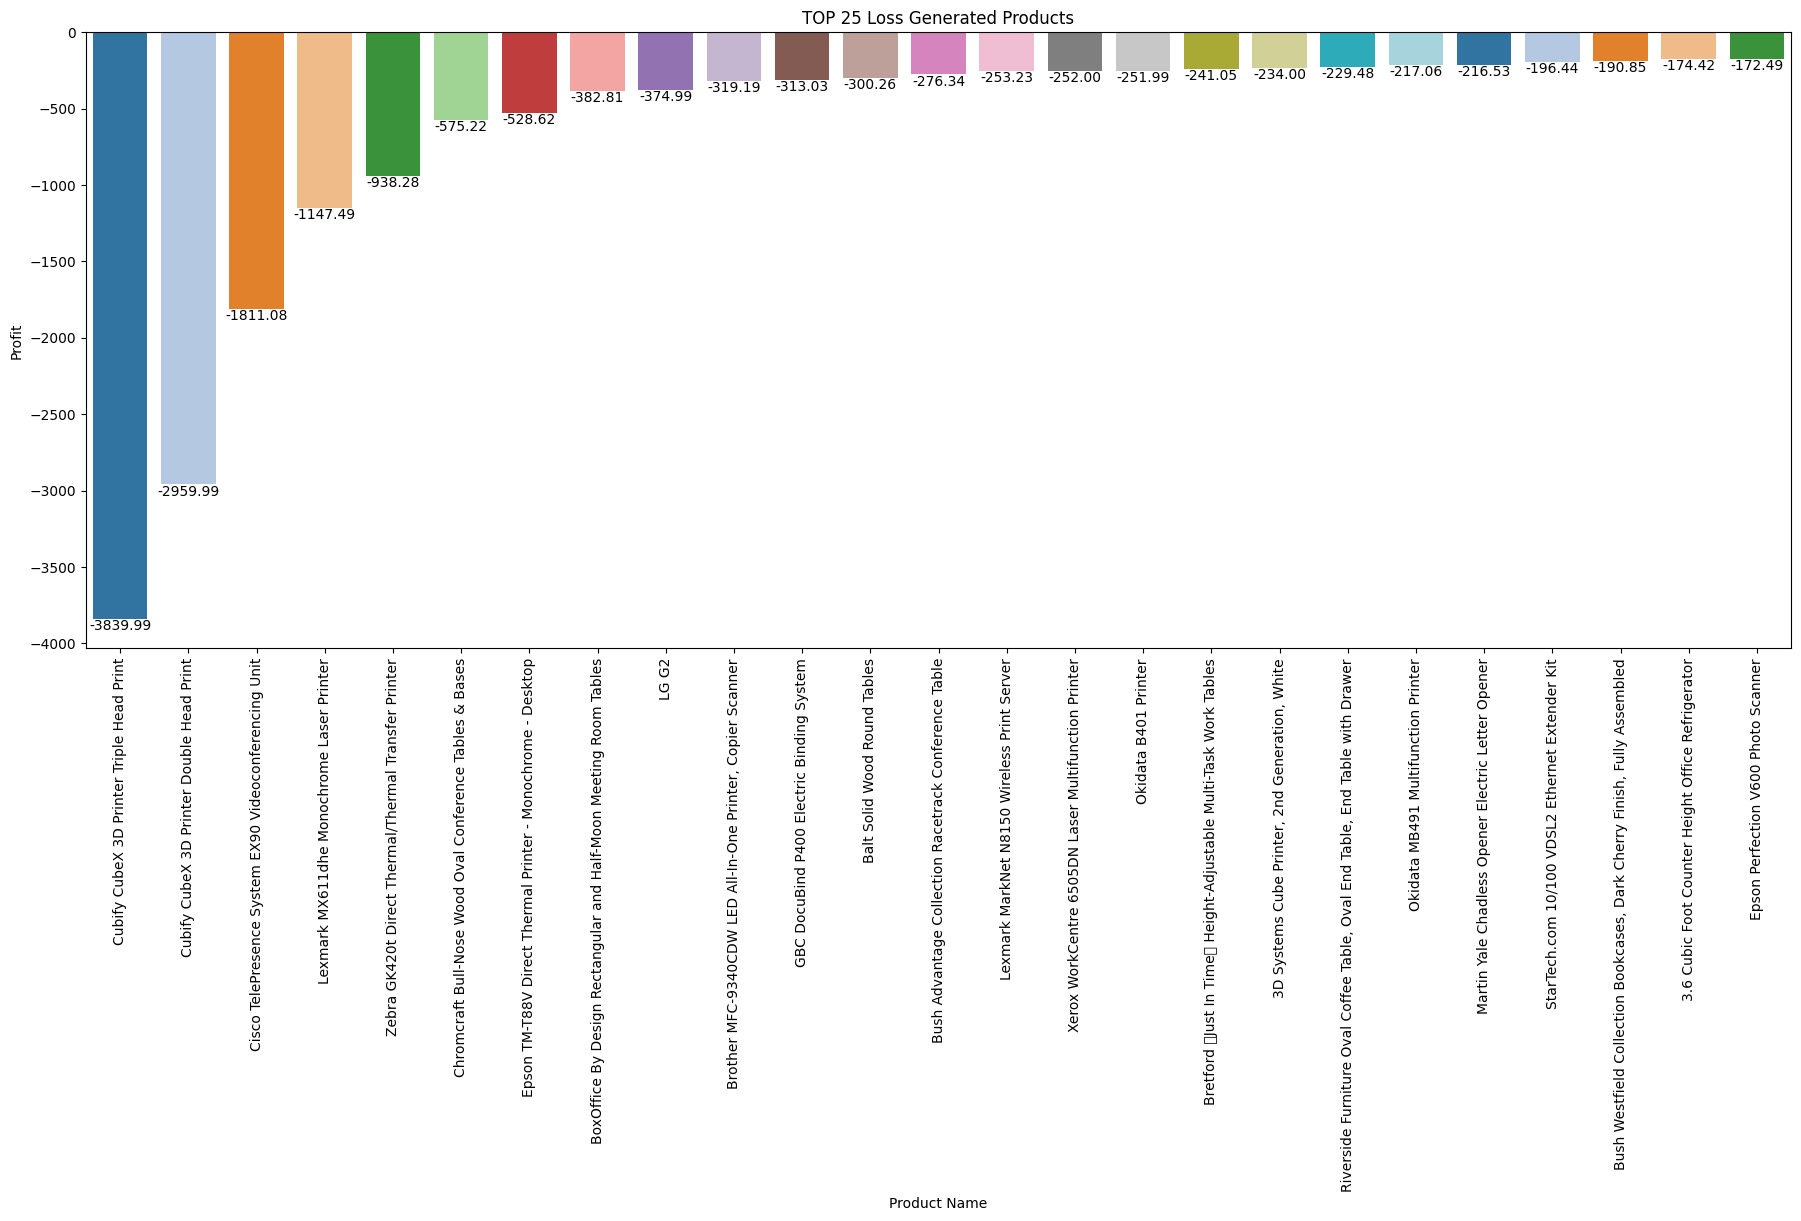

In [25]:
# Plot Graph
plt.figure(figsize=(22,8))
ax =sns.barplot(x='Product Name',
                y='Profit',
                data =top_25_losser_products,
                hue='Product Name',
                palette='tab20')
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.2f')

plt.xticks(rotation=90)
plt.title("TOP 25 Loss Generated Products")
plt.show()

### Monthly Sales Analysis

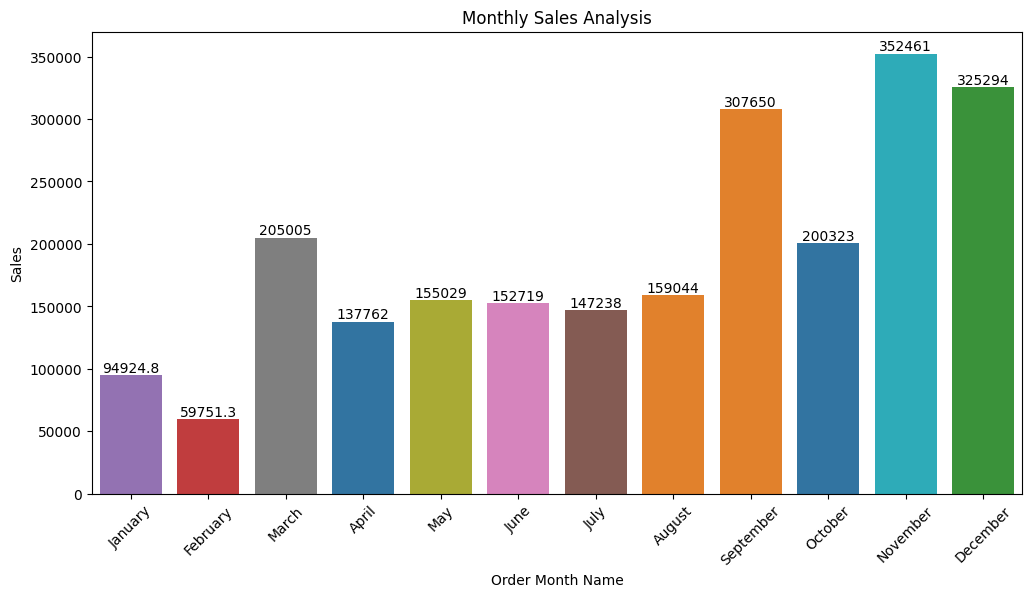

In [26]:
sales_by_months = df.groupby(['Order Month Name'],as_index=False)['Sales'].sum()
col_order = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
# Plot Graph
plt.figure(figsize=(12,6))
ax =sns.barplot(
    x= 'Order Month Name',
    y= 'Sales',
    palette='tab10',
    order=col_order,
    hue= 'Order Month Name',
    
    errorbar=None,
    data =sales_by_months)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation =45 )
plt.title('Monthly Sales Analysis')
plt.show()

    Highest Sales Month :- November(352461), December(3252894)                                              
    Lowest Sales Month :- January(94924.8), February(59751.2)

### Monthly Profit Analysis

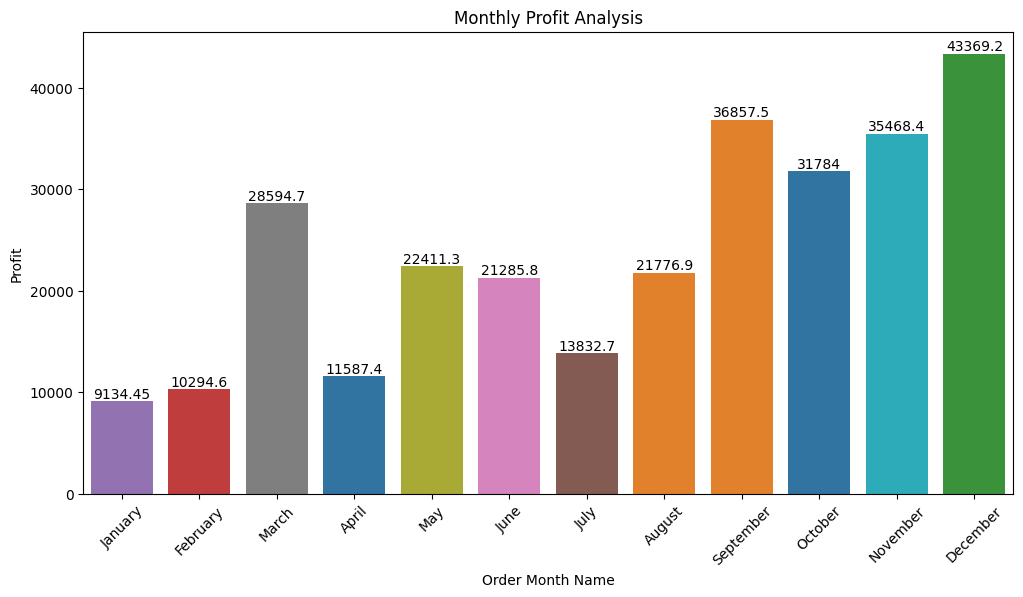

In [27]:
profit_by_months = df.groupby(['Order Month Name'],as_index=False)[['Profit','Sales']].sum()
col_order = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
# Plot Graph
plt.figure(figsize=(12,6))
ax =sns.barplot(
    x= 'Order Month Name',
    y= 'Profit',
    palette='tab10',
    order=col_order,
    hue= 'Order Month Name',
    
    errorbar=None,
    data =profit_by_months)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation =45 )
plt.title('Monthly Profit Analysis')
plt.show()

Conclusion:-   
        
     The fourth quarter (September, October, November, December) is the most profitable months, which shows a strong seasonality.
     and Jan, Feb, April are the least profitable months.

### Top 10 Profitable States

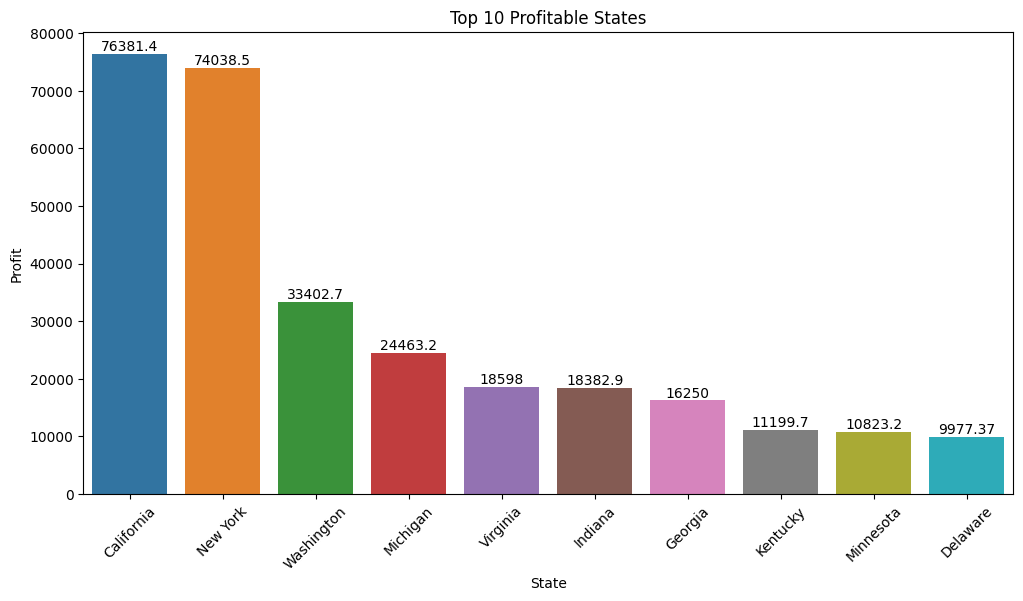

In [28]:
top_profitable_State  = df.groupby(['State'],as_index=False)['Profit'].sum().sort_values(by ='Profit',ascending=False).head(10)

# Plot Graph
plt.figure(figsize=(12,6))
ax =sns.barplot(
    data =top_profitable_State,
    x='State',
    y='Profit',
    palette="tab10",
    hue='State'
    
)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation =45)
plt.title('Top 10 Profitable States')
plt.show()

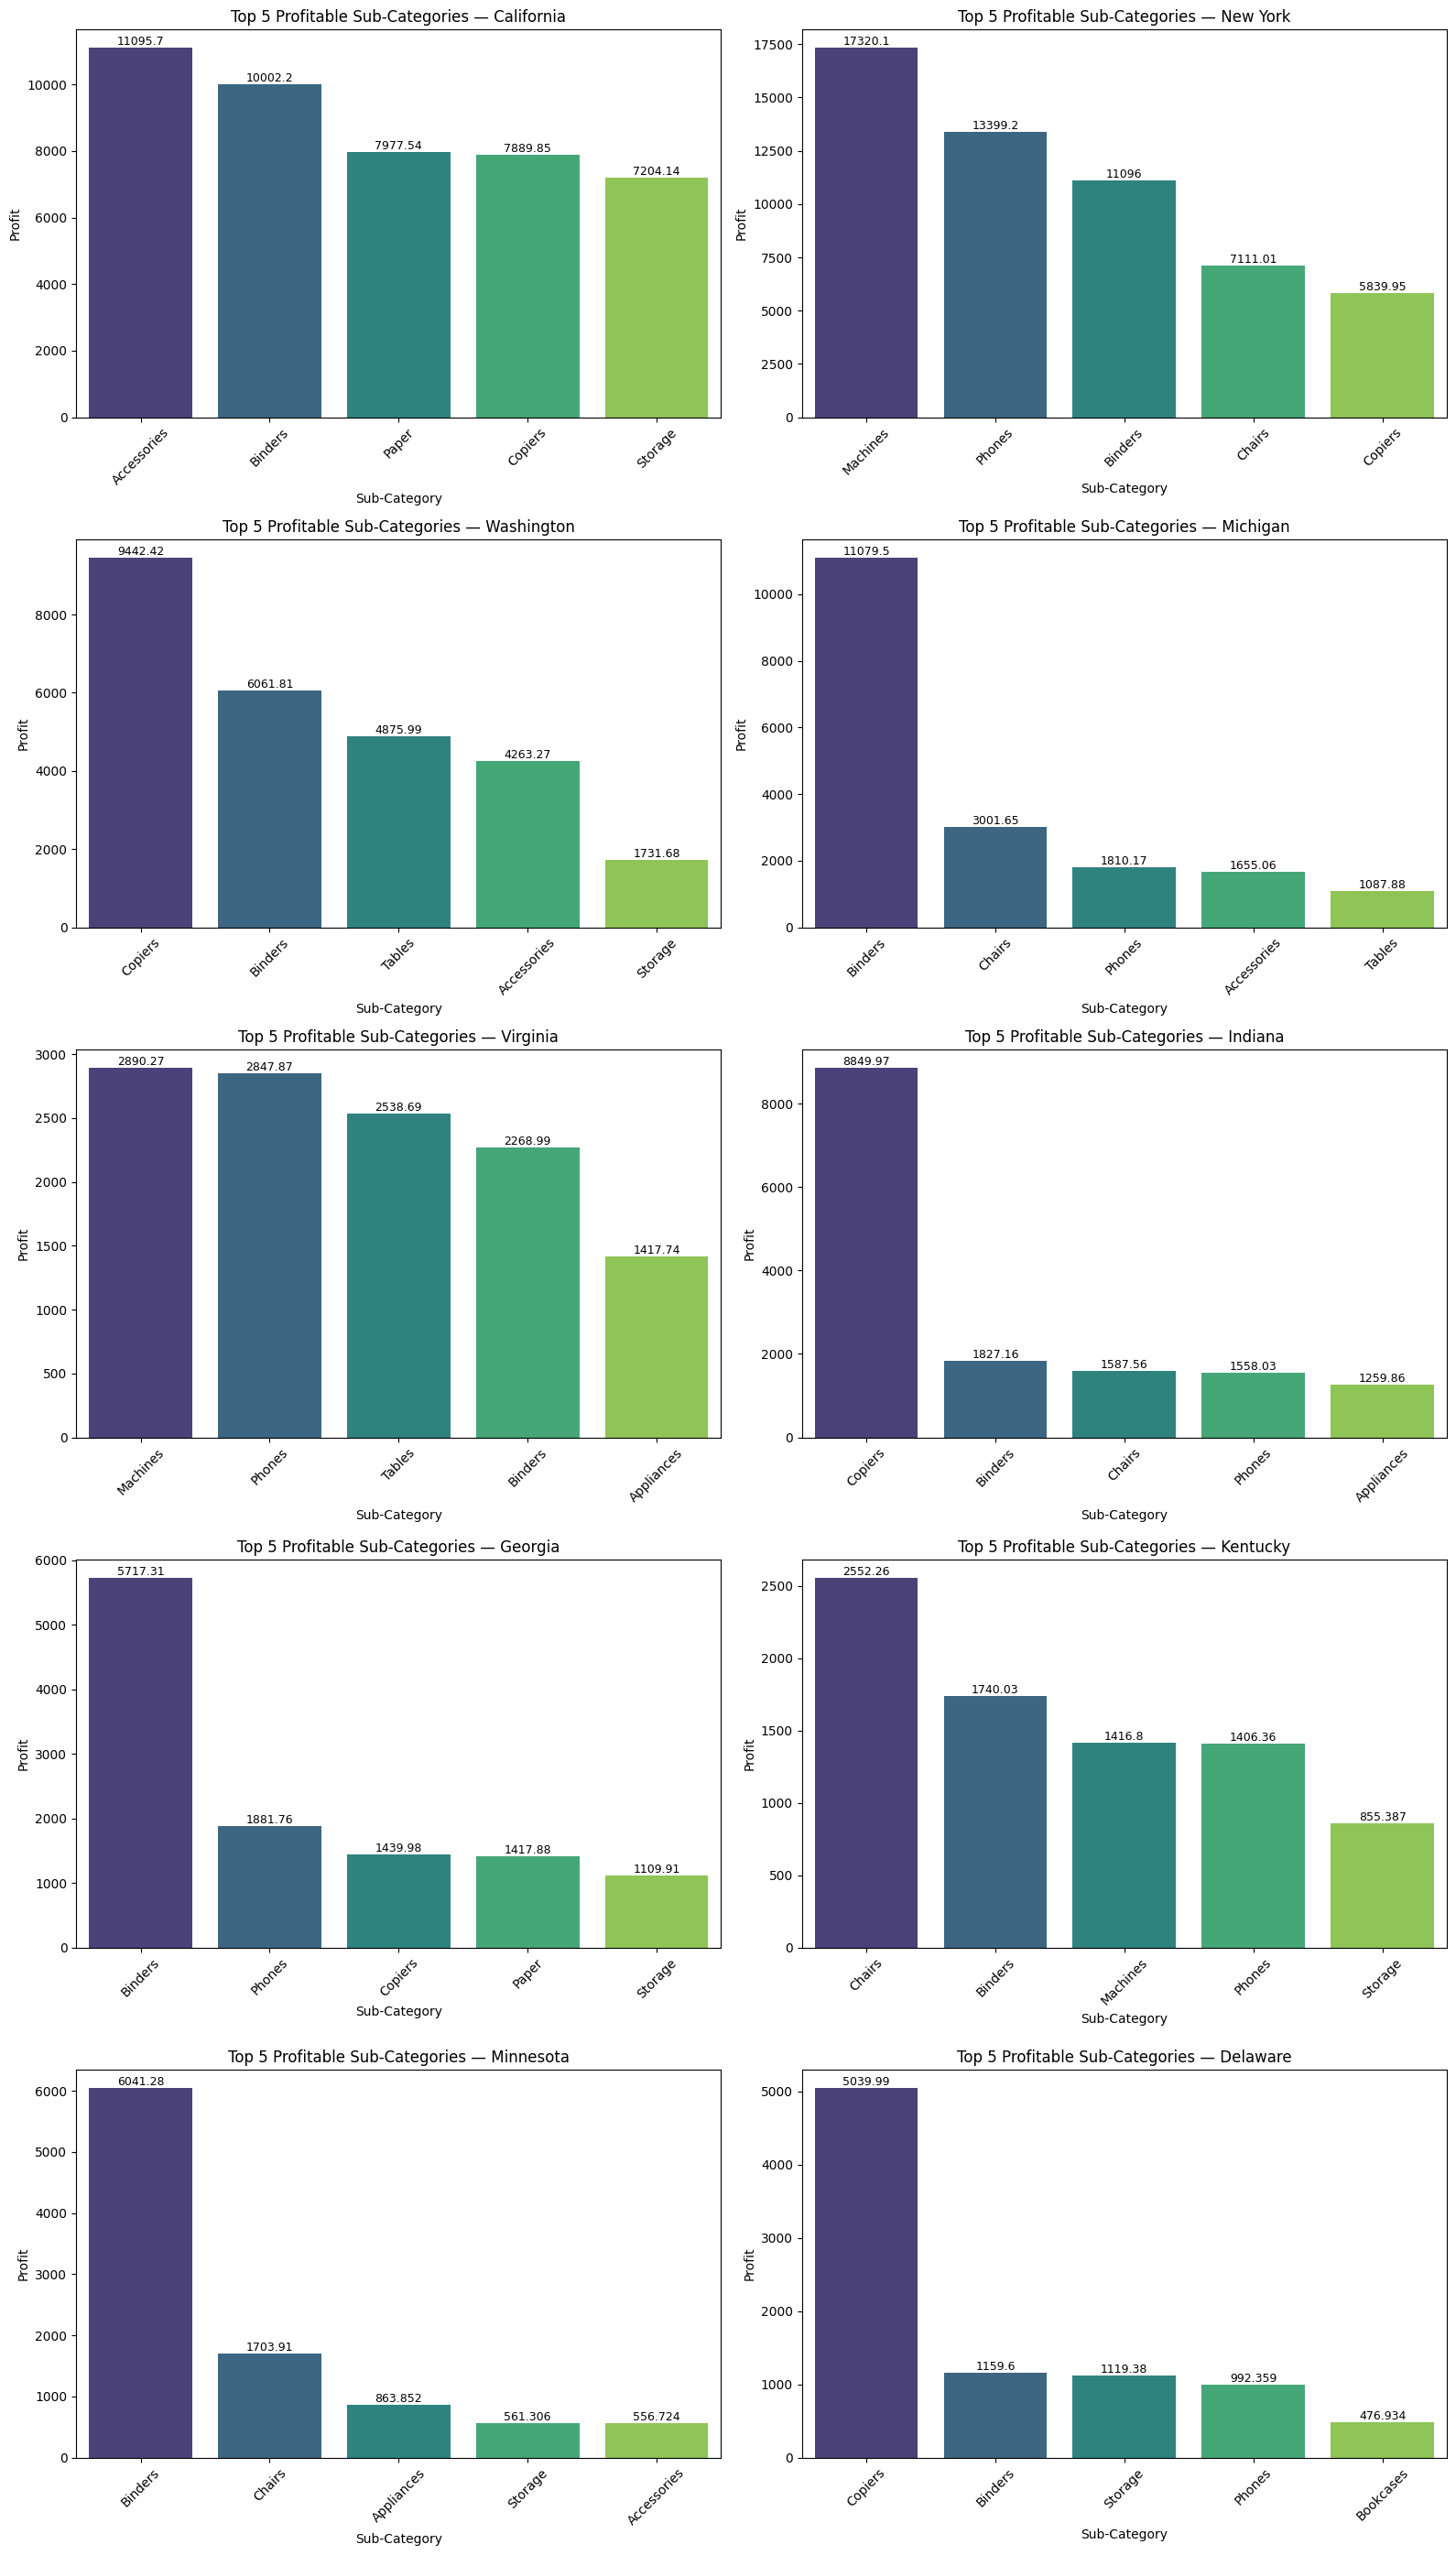

In [29]:


# Step 1: Top 10 profitable states
top_states = (
    df.groupby('State', as_index=False)['Profit']
      .sum()
      .sort_values(by='Profit', ascending=False)
      .head(10)
)

# Step 2: Filter only those 10 states
df_top = df[df['State'].isin(top_states['State'])]

# Step 3: Top 5 profitable Sub-Category for each of those states
top5_sub_by_state = (
    df_top.groupby(['State', 'Sub-Category'], as_index=False)['Profit']
          .sum()
)

# Keeping only top 5 per state
top5_sub_by_state = (
    top5_sub_by_state
    .sort_values(['State', 'Profit'], ascending=[True, False])
    .groupby('State')
    .head(5)
)

# Step 4: Plot each state as a separate bar graph
unique_states = top_states['State'].tolist()

fig, axes = plt.subplots(5, 2, figsize=(16, 28))  # 10 graphs (5 rows × 2 columns)
axes = axes.flatten()

for i, state in enumerate(unique_states):
    ax = axes[i]
    
    temp = top5_sub_by_state[top5_sub_by_state['State'] == state]
    
    sns.barplot(
        data=temp,
        x='Sub-Category',
        y='Profit',
        ax=ax,
        palette='viridis',
        hue='Sub-Category'
    )
    
    ax.set_title(f"Top 5 Profitable Sub-Categories — {state}", fontsize=12)
    ax.set_xlabel("Sub-Category")
    ax.set_ylabel("Profit")
    ax.tick_params(axis='x', rotation=45)
    
    # Labels on bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=9)


plt.tight_layout()
plt.show()


Conslusion:-   

        These are top 10 profitable states acrross all others. and California, New York most Profitable States

### Sales and Profit Analysis by Customer Segment

In [30]:
sales_profit_by_segment = df.groupby(['Segment'],as_index=False)[['Sales','Profit']].sum()
sales_profit_by_segment['Sales_in_Millions']= sales_profit_by_segment['Sales'] /100000
sales_profit_by_segment['Profit_in_Millions']= sales_profit_by_segment['Profit'] /100000
sales_profit_by_segment

,Segment,Sales,Profit,Sales_in_Millions,Profit_in_Millions
0,Consumer,1.161401e+06,134119.2092,11.614013,1.341192
1,Corporate,7.061464e+05,91979.1340,7.061464,0.919791
2,Home Office,4.296531e+05,60298.6785,4.296531,0.602987


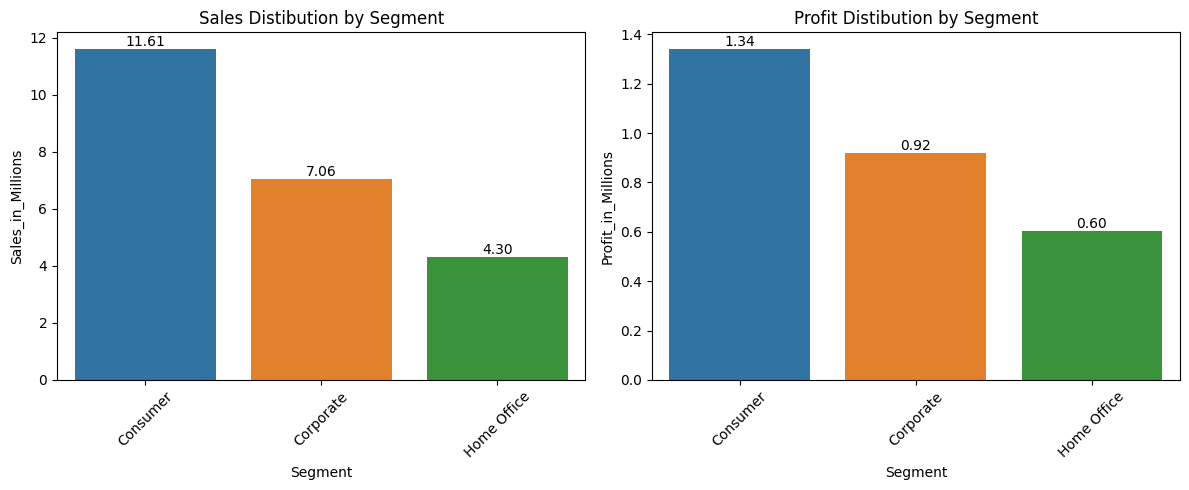

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figure aur subplots create kar rahe hain (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# --- Graph 1: Sales ---
sns.barplot(
    data=sales_profit_by_segment,
    x='Segment',
    y='Sales_in_Millions',
    palette='tab10',
    hue='Segment',
    ax=ax1
)
for bars in ax1.containers:
    ax1.bar_label(bars, fmt='%.2f')
ax1.set_title("Sales Distibution by Segment")
ax1.set_xticks(range(len(sales_profit_by_segment)))
ax1.set_xticklabels(sales_profit_by_segment['Segment'], rotation=45)


# --- Graph 2: Profit ---
sns.barplot(
    data=sales_profit_by_segment,
    x='Segment',
    y='Profit_in_Millions',  # agar scale ka issue ho toh scale kar sakte ho
    palette='tab10',
    hue='Segment',
    ax=ax2
)
for bars in ax2.containers:
    ax2.bar_label(bars, fmt='%.2f')
ax2.set_title("Profit Distibution by Segment")
ax2.set_xticks(range(len(sales_profit_by_segment)))
ax2.set_xticklabels(sales_profit_by_segment['Segment'], rotation=45)

plt.tight_layout()
plt.show()


### Sales Profit Ratio

In [32]:
sales_profit_by_segment['Sales_to_Profit_Ratio'] =(sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit'])
print('Sales Profit Ratio\n\n',sales_profit_by_segment[['Segment','Sales_to_Profit_Ratio']])

Sales Profit Ratio

        Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


In [33]:
column

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Month Name',
       'Order Day of Week', 'Ship Year', 'Ship Month', 'Ship Month Name',
       'Ship Day of Week'],
      dtype='object')

In [34]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [35]:
df_product =df.groupby(['Product Name'])

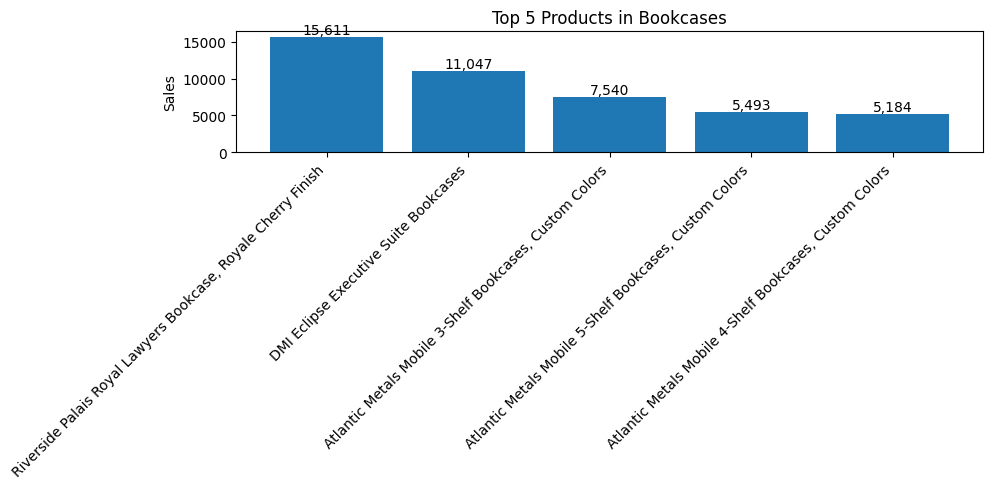

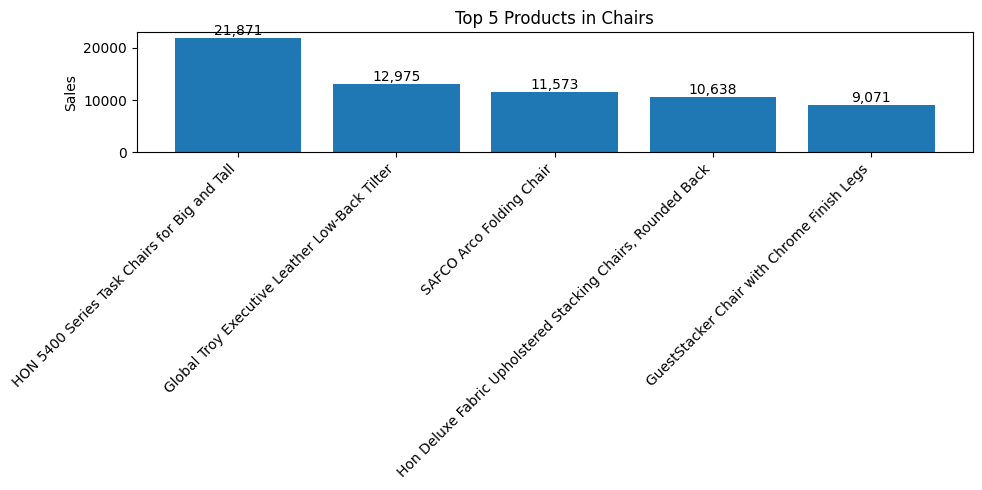

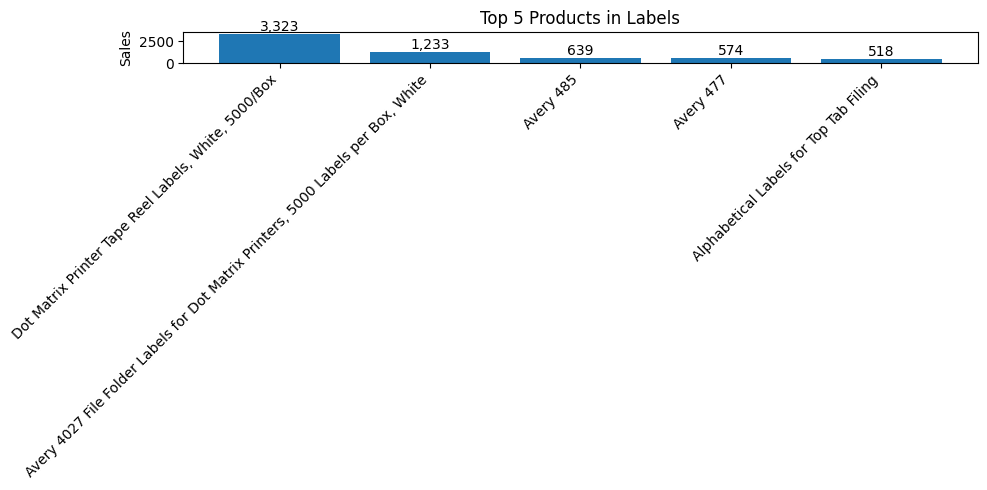

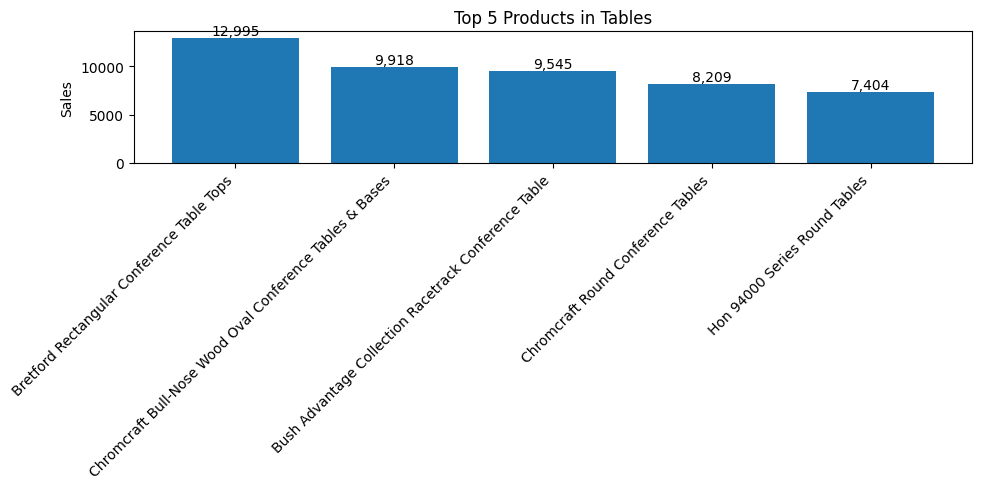

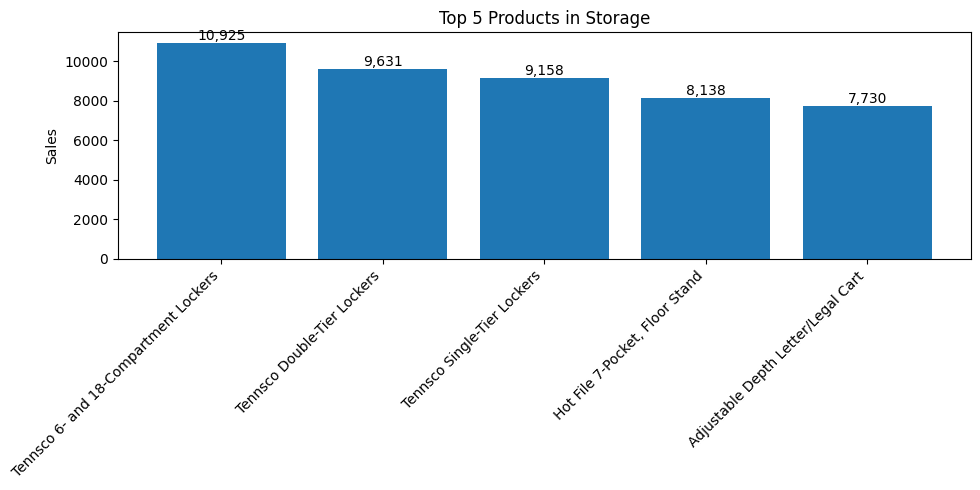

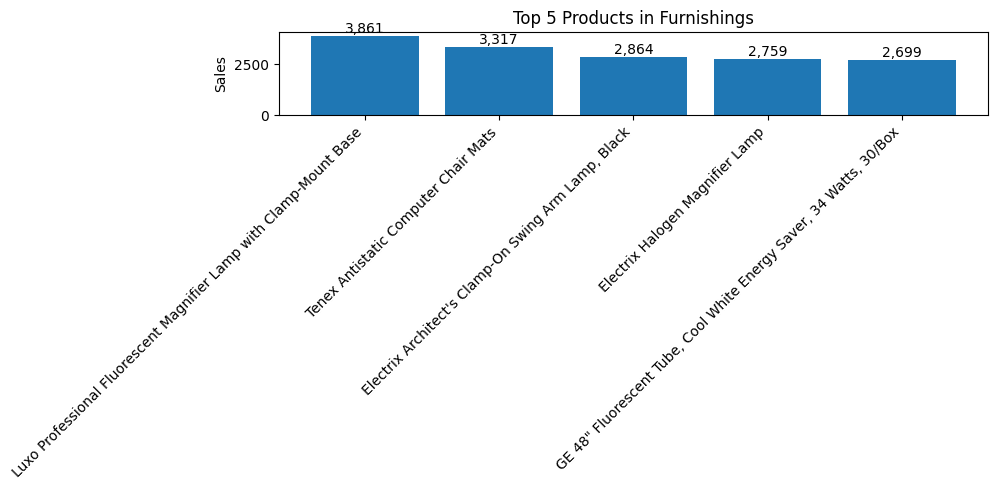

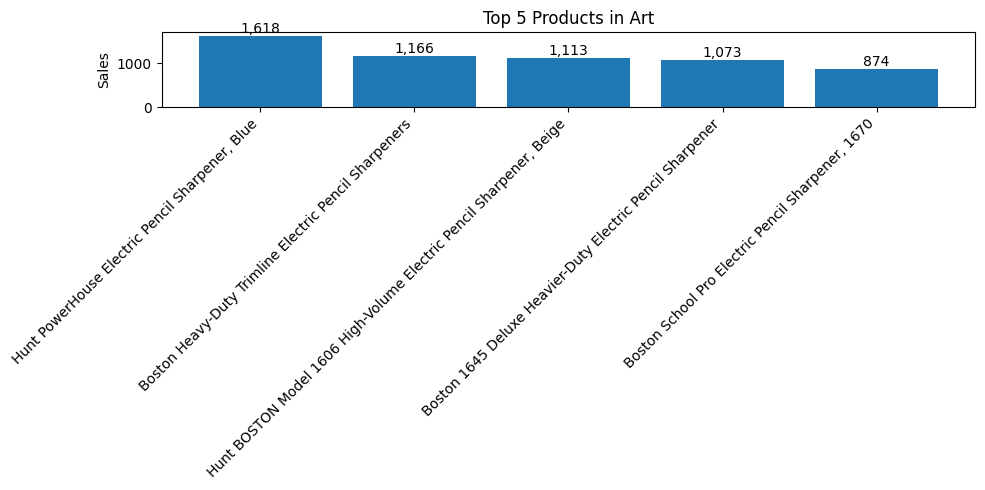

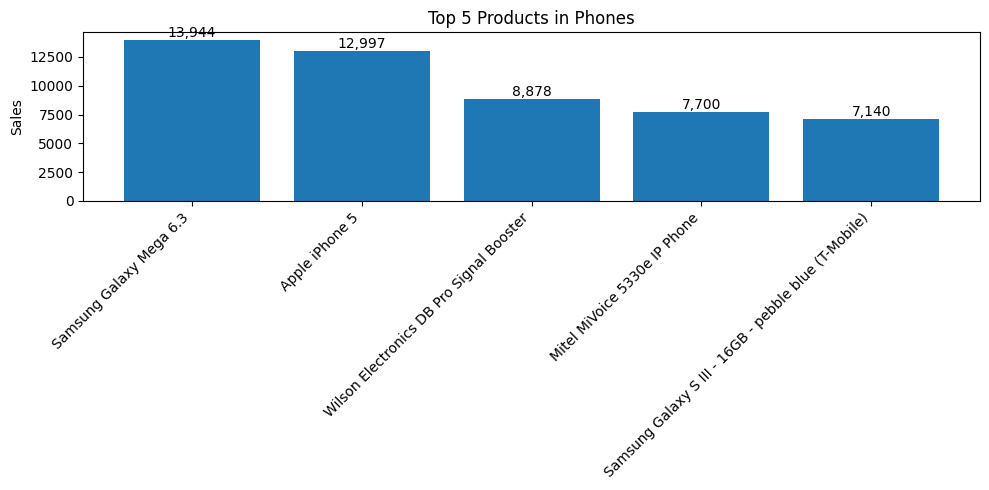

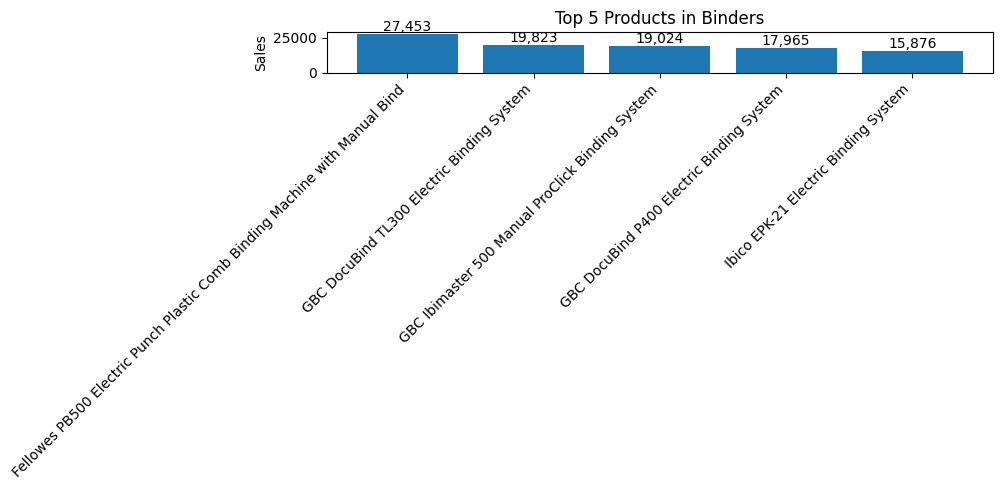

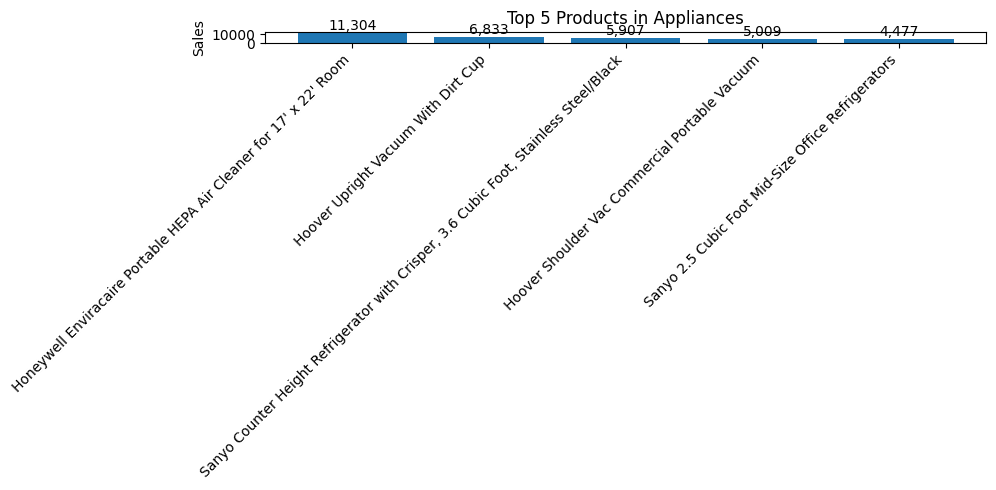

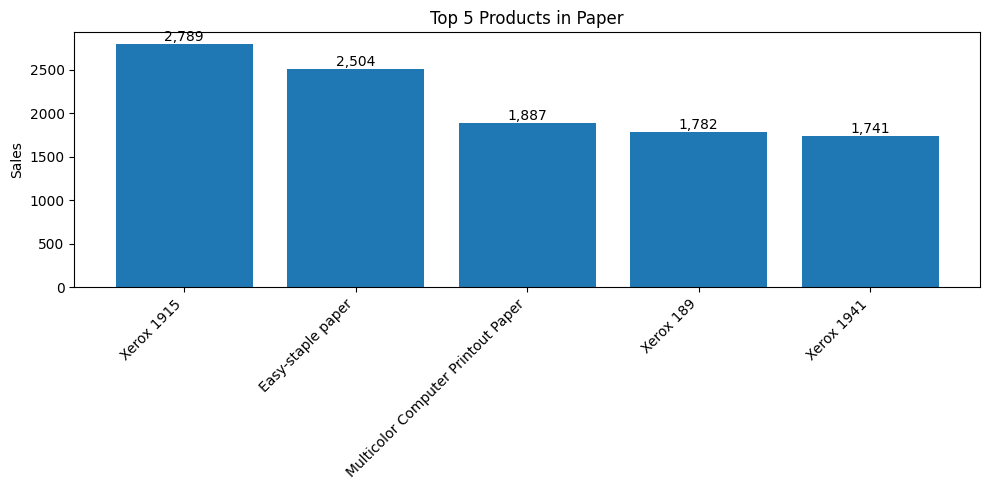

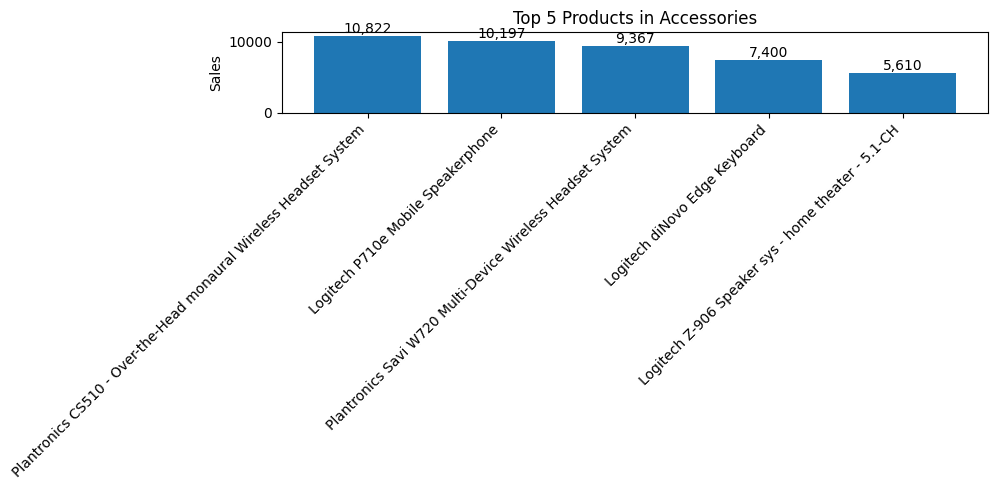

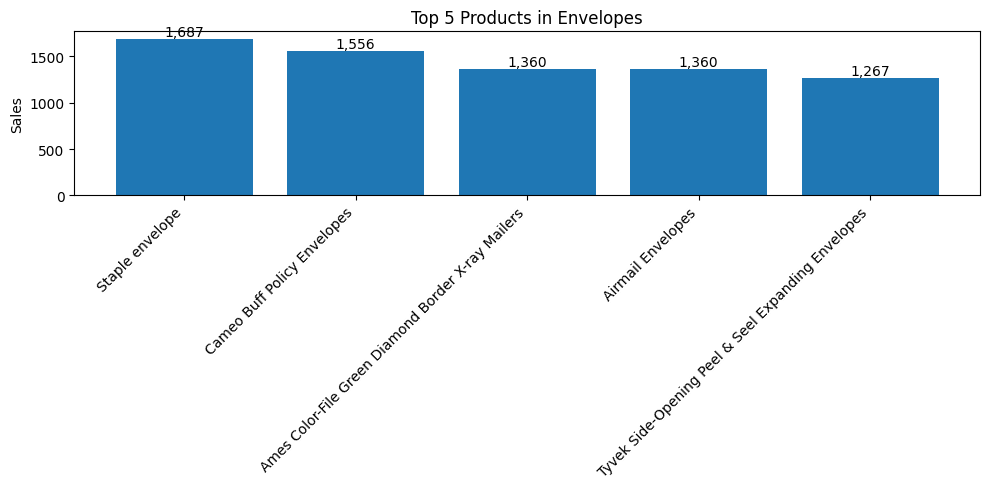

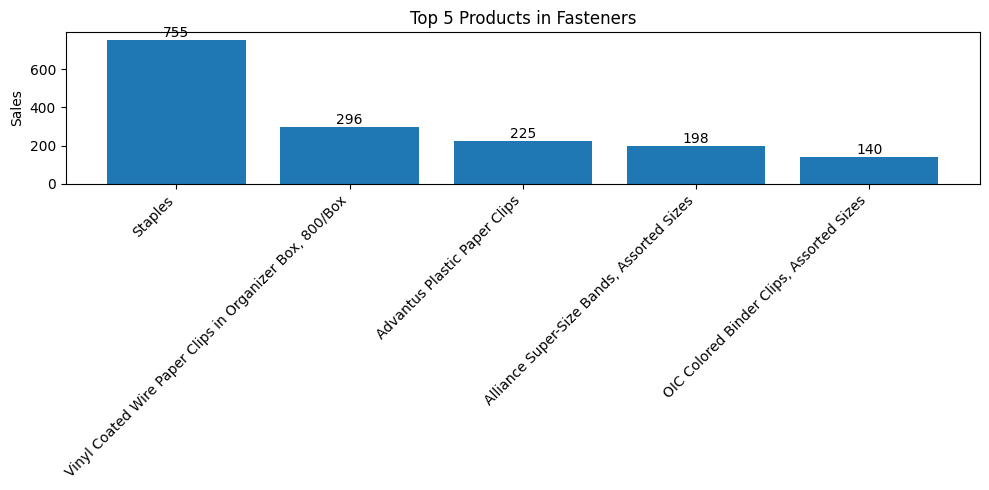

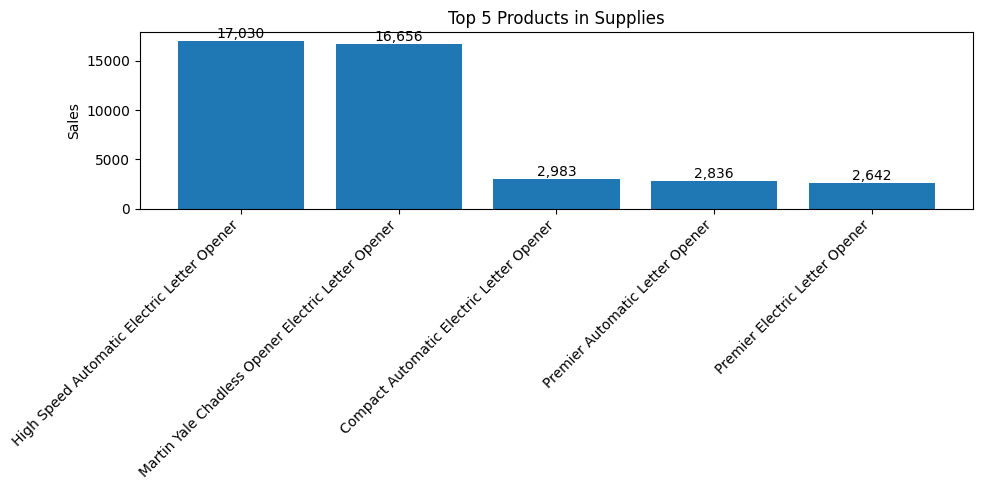

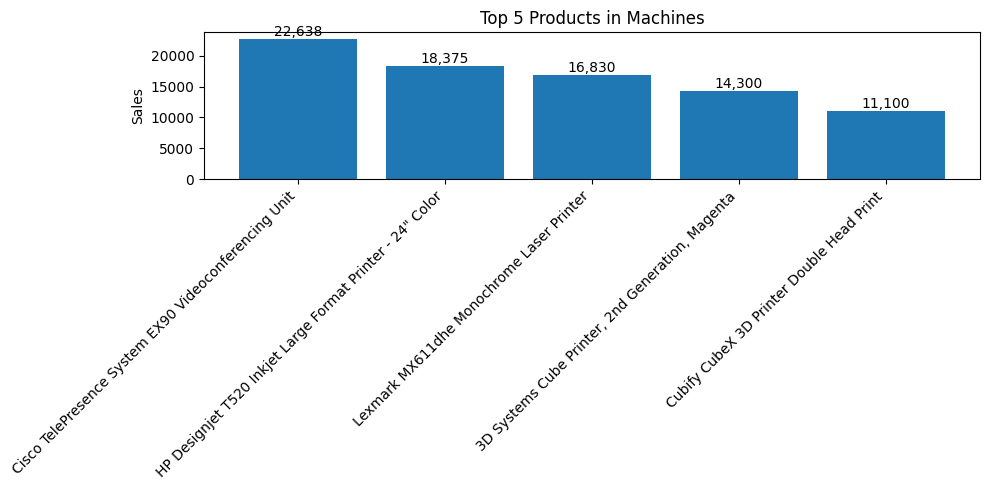

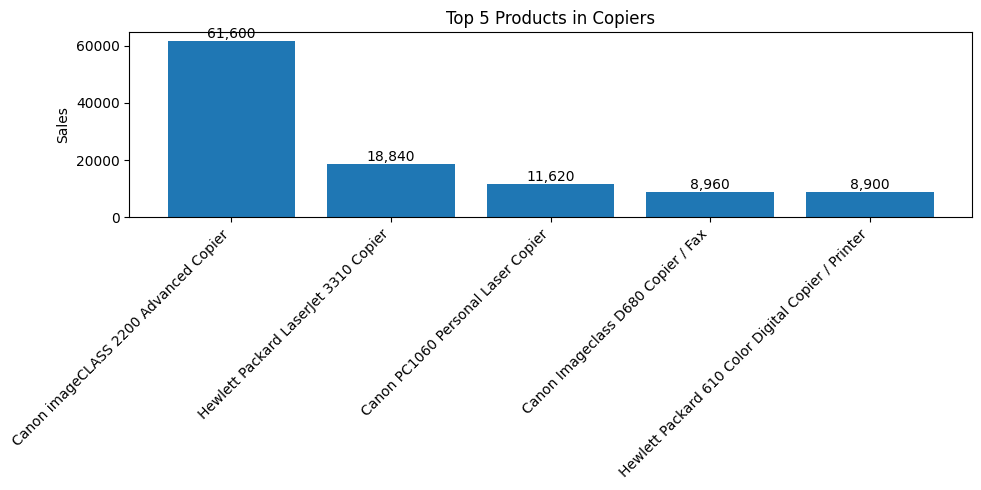

In [36]:
# Create separate DF for each Sub-Category
dfs = {sub: df[df['Sub-Category'] == sub] for sub in df['Sub-Category'].unique()}

# Example: Access DF for 'Chairs'
# dfs['Chairs']['Product Name'].unique()


top5_by_subcategory = (
    df.groupby(['Sub-Category', 'Product Name'], as_index=False)['Sales']
      .sum()
      .sort_values(['Sub-Category', 'Sales'], ascending=[True, False])
)

# Har sub-category ke top 5
top5_by_subcategory = top5_by_subcategory.groupby('Sub-Category').head(5)

sub_categories = df['Sub-Category'].unique()

for sub in sub_categories:
    temp = top5_by_subcategory[top5_by_subcategory['Sub-Category'] == sub]

    plt.figure(figsize=(10,5))
    plt.bar(temp['Product Name'], temp['Sales'])
    plt.title(f"Top 5 Products in {sub}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Sales")
    
    # Value labels
    for i, v in enumerate(temp['Sales']):
        plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [37]:
df['State'].nunique()

49

In [38]:
column

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Month Name',
       'Order Day of Week', 'Ship Year', 'Ship Month', 'Ship Month Name',
       'Ship Day of Week'],
      dtype='object')

In [39]:
df_discount=df.groupby(['Sub-Category'],as_index=False)[['Discount','Profit']].mean().sort_values(by='Discount',ascending =False)
df_discount['Discount']= df_discount['Discount']*100
df_discount

,Sub-Category,Discount,Profit
3,Binders,37.229153,19.843574
11,Machines,30.608696,29.432669
16,Tables,26.128527,-55.565771
4,Bookcases,21.114035,-15.230509
5,Chairs,17.017828,43.095894
1,Appliances,16.652361,38.922758
6,Copiers,16.176471,817.909190
13,Phones,15.455568,50.073938
9,Furnishings,13.834901,13.645918
8,Fasteners,8.202765,4.375660


In [40]:
df_quantity=df.groupby(['Category'],as_index=False)['Quantity'].mean()
df_quantity

,Category,Quantity
0,Furniture,3.785007
1,Office Supplies,3.801195
2,Technology,3.756903


### Customer Segmentation

In [41]:

# Latest date for recency
max_date = df['Order Date'].max()

# RFM Metrics
cust = df.groupby('Customer ID').agg(
    Total_Sales = ('Sales','sum'),
    Total_Orders = ('Order ID','nunique'),
    Last_Order_Date = ('Order Date','max')
).reset_index()

cust['Recency'] = (max_date - cust['Last_Order_Date']).dt.days

cust_rfm = cust[['Customer ID','Total_Sales','Total_Orders','Recency']]
cust_rfm.head(10)


,Customer ID,Total_Sales,Total_Orders,Recency
0,AA-10315,5563.560,5,184
1,AA-10375,1056.390,9,19
2,AA-10480,1790.512,4,259
3,AA-10645,5086.935,6,55
4,AB-10015,886.156,3,415
5,AB-10060,7755.620,8,54
6,AB-10105,14473.571,10,41
7,AB-10150,966.710,5,41
8,AB-10165,1113.838,8,25
9,AB-10255,914.532,9,166


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(cust_rfm[['Total_Sales','Total_Orders','Recency']])


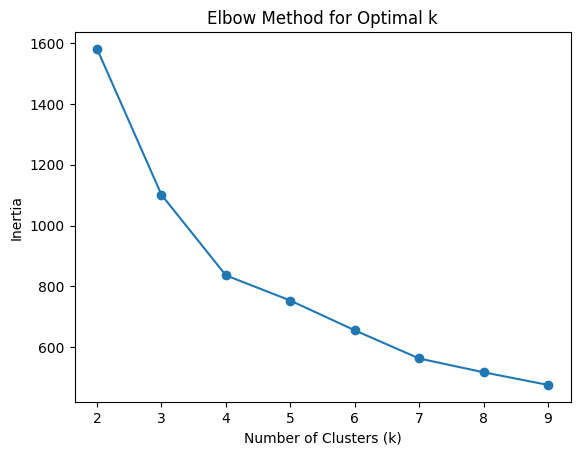

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [44]:
kmeans = KMeans(n_clusters=4, random_state=42)
cust_rfm['Cluster'] = kmeans.fit_predict(scaled)


In [45]:
cluster_profile = cust_rfm.groupby('Cluster').agg(
    Avg_Sales=('Total_Sales','mean'),
    Avg_Orders=('Total_Orders','mean'),
    Avg_Recency=('Recency','mean'),
    Count=('Customer ID','count')
).reset_index()

cluster_profile.sort_values(by ='Count',ascending=False)


,Cluster,Avg_Sales,Avg_Orders,Avg_Recency,Count
1,1,1669.688290,4.731343,100.197015,335
0,0,3322.222985,8.516779,71.741611,298
3,3,1470.228226,3.697917,558.489583,96
2,2,9479.545687,8.296875,122.718750,64


In [48]:
# High Frequency, High Value, Recent Buyers
High_Frequency_Buyers = cust_rfm[cust_rfm['Cluster'] == 0]

# Regular Medium Buyers
Regular_Medium_Buyers = cust_rfm[cust_rfm['Cluster'] == 1]

# VIP Premium Customers
VIP_Premium_Customers = cust_rfm[cust_rfm['Cluster'] == 2]

# Inactive Customers
Inactive_Customers = cust_rfm[cust_rfm['Cluster'] == 3]


In [50]:
VIP_Premium_Customers.head()

,Customer ID,Total_Sales,Total_Orders,Recency,Cluster
5,AB-10060,7755.620,8,54,2
6,AB-10105,14473.571,10,41,2
34,AH-10690,7888.294,12,410,2
48,AR-10540,6608.448,6,6,2
65,BB-11545,6765.728,9,28,2


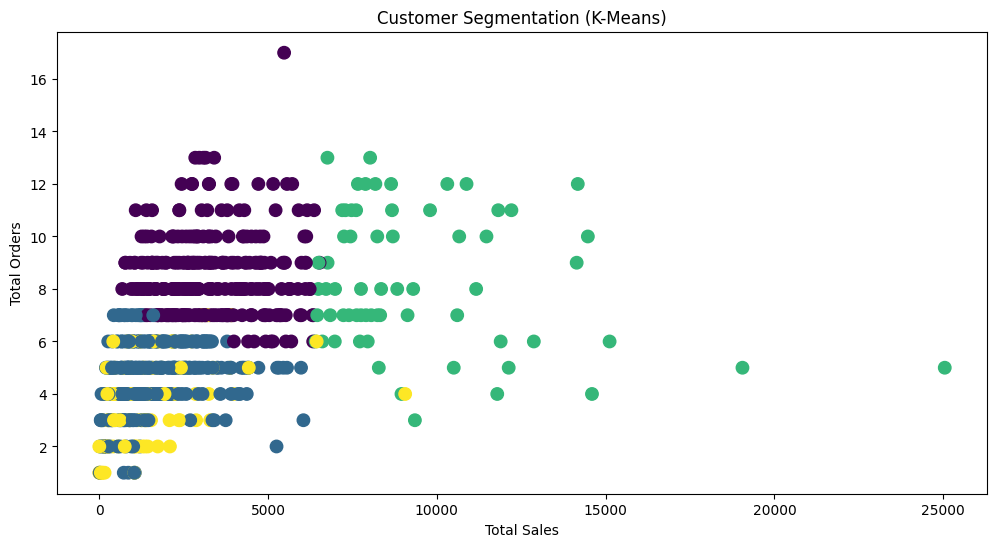

In [51]:
plt.figure(figsize=(12,6))
plt.scatter(cust_rfm['Total_Sales'], cust_rfm['Total_Orders'], 
            c=cust_rfm['Cluster'], s=80)
plt.xlabel("Total Sales")
plt.ylabel("Total Orders")
plt.title("Customer Segmentation (K-Means)")
plt.show()


# Cluster-Wise Marketing Strategy (RFM + K-Means Segmentation)

## Cluster 0 — High-Frequency, High-Value, Recent Buyers

### Profile:-
    Purchase frequently
    Strong spending behavior
    Very recent transactions
    Highly loyal to the brand

### Marketing Strategy:-
    Enhance Loyalty Programs: Offer 2X reward points,
    early access to new launches.
    Cross-Selling: Promote complementary products based on past patterns.
    Exclusive VIP Offers: Private sales, personalized recommendations.
    Limit Discounts: Focus on value-added benefits rather than price cuts.

### Goal:
    Strengthen loyalty and increase overall lifetime value.


## Cluster 1 — Mid-Value, Moderate Frequency Buyers

### Profile:-
    Moderate spending Average purchase
    frequency Recency indicates slight inactivity (~100 days)

### Marketing Strategy:-
    Win-Back Offers: Limited-time 10% discount to motivate repeat buying.
    Reminder Campaigns: Festival alerts, back-in-stock messages.
    Bundle Deals: Buy-2-Get-1 or combo packs to increase basket size.
    Recommendation Engine: Suggest products based on past orders.

### Goal:-
    Reactivate customers and convert them into regular buyers.


## Cluster 2 — VIP Premium Customers (Highest Revenue Contributors)

### Profile:-
    Highest spending group
    High order counts
    Very recent engagement
    Most profitable segment

### Marketing Strategy:-
    Premium Membership Programs: Free delivery, priority support, exclusive access.
    Personalized Premium Emails: High-ticket product suggestions.
    Early Access to Launches: 48-hour early previews, invite-only events.
    Relationship Building: Birthday offers, personalized messages.
    Retention Focus: Provide subtle discounts and premium service quality.

### Goal:
    Preserve loyalty and maximize premium upsell opportunities.

## Cluster 3 — Lost / Inactive Customers (Churned Segment)

### Profile:-
    Very high recency (~550 days)
    Rare purchases
    Low spend and low engagement

### Marketing Strategy:-
    Reactivation Offers: “We Miss You – Flat 25% Off” type campaigns.
    Feedback Survey: Identify causes of churn and reward survey completion.
    Budget-Friendly Promotions: Highlight low-cost essentials.
    Urgency Marketing: Flash deals, 24-hour offers.
    Direct Outreach: SMS/WhatsApp performs better than email for this group.

### Goal:
    Bring customers back into the buying cycle.


